# Capstone 3

## Pre-Processing & Training

Now that we have completed the first two sections of this project (the Data Wrangling and Exploratory Data Analysis), it is time to move on to pre-processing and training our data so that it can be used in upcoming models.

## 1. Table of Contents

[1. Table of Contents](#1.-Table-of-Contents)

[2. Import Packages](#2.-Import-Packages)

[3. Load Data](#3.-Load-Data)

[4. Explore the Data](#4.-Explore-the-Data)

[5. Dummy Variables](#5.-Dummy-Variables)

[6. Train/Test Split](#6.-Train/Test-Split)

## 2. Import Packages

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report,confusion_matrix
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report,plot_confusion_matrix

## 3. Load Data

In [2]:
df=pd.read_csv('/Users/lauren/Desktop/diabetes_data_cleaned.csv')

## 4. Explore the Data

In [3]:
df.head()

,Unnamed: 0,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,0,1,26,0,0,0,1,...,1,0,3,5,30,0,1,4,6,8
1,1,0,1,1,1,26,1,1,0,0,...,1,0,3,0,0,0,1,12,6,8
2,2,0,0,0,1,26,0,0,0,1,...,1,0,1,0,10,0,1,13,6,8
3,3,0,1,1,1,28,1,0,0,1,...,1,0,3,0,3,0,1,11,6,8
4,4,0,0,0,1,29,1,0,0,1,...,1,0,2,0,0,0,0,8,5,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Unnamed: 0            70692 non-null  int64
 1   Diabetes_binary       70692 non-null  int64
 2   HighBP                70692 non-null  int64
 3   HighChol              70692 non-null  int64
 4   CholCheck             70692 non-null  int64
 5   BMI                   70692 non-null  int64
 6   Smoker                70692 non-null  int64
 7   Stroke                70692 non-null  int64
 8   HeartDiseaseorAttack  70692 non-null  int64
 9   PhysActivity          70692 non-null  int64
 10  Fruits                70692 non-null  int64
 11  Veggies               70692 non-null  int64
 12  HvyAlcoholConsump     70692 non-null  int64
 13  AnyHealthcare         70692 non-null  int64
 14  NoDocbcCost           70692 non-null  int64
 15  GenHlth               70692 non-null  int64
 16  Ment

In [5]:
df.shape

(70692, 23)

In [6]:
df.dtypes

Unnamed: 0              int64
Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0              0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              70692 non-null  int64
 16  Phys

Of our target variable, "Diabetes_binary", how many participants were diagnosed with either pre-diabetes or diabetes and how many were not diagnosed with diabetes?  Let's find out.

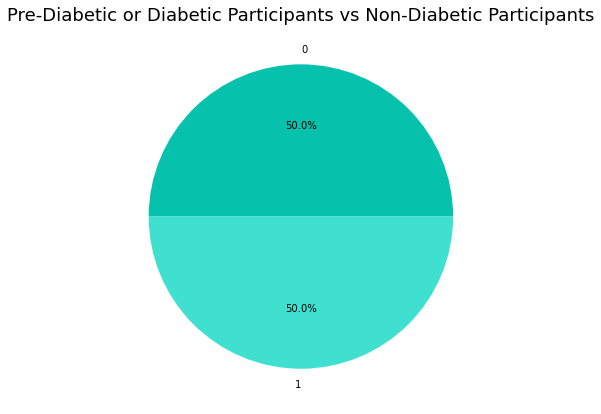

In [8]:
labels = df['Diabetes_binary'].value_counts().index
sizes = df['Diabetes_binary'].value_counts()
plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors = ['#06C2AC','#40E0D0'])
plt.title('Pre-Diabetic or Diabetic Participants vs Non-Diabetic Participants',color = 'black',fontsize = 18);

## 5. Dummy Variables

To use categorical variables in a machine learning model, we first need to represent them in a quantitative way.  In order to do that, we use dummy variables.

However, in this particular dataset we do not need to use dummy variables as all of the data has already been represented quantitatively.

## 6. Train/Test Split

We need to split the data into a training set and a testing set.

First, let's determine the partition sizes for a 70/30 train/test split:

In [10]:
len(df) * .7, len(df) * .3

(49484.399999999994, 21207.6)

In [11]:
df = df.reset_index()

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Diabetes_binary']),
                                                    df.Diabetes_binary, stratify=df.Diabetes_binary,
                                                    test_size = 0.3,
                                                    random_state = 47)

We performed a stratified train/test split of the dataset.  Stratification is done for classifition machine learning problems to avoid overfitting or underfitting, as it helps to ensure that the target variable (in this case, "Diabetes_binary") will have the same distribution in our training data.

In [12]:
X_train.shape, X_test.shape

((49484, 22), (21208, 22))

In [13]:
y_train.shape, y_test.shape

((49484,), (21208,))

In [14]:
# Construct the LogisticRegression model
clf = LogisticRegression(max_iter=1000)

# Fit the model on the training data.
clf.fit(X_train, y_train) 

# Print the accuracy from the testing data.
# Introduce variable to be reused later
y_predict_test = clf.predict(X_test)
print("\n")
print("[Test] Accuracy score (y_predict_test, y_test):",accuracy_score(y_predict_test, y_test))

# Note the order in which the parameters must be passed
# according to the documentation ... although there should be
# no difference since it is a one-to-one comparison ...
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
print("\n")
print("[Test] Accuracy score: (y_test, y_predict_test)",accuracy_score(y_test, y_predict_test))

y_predict_training = clf.predict(X_train)
print("\n")
print("[Training] Accuracy score: (y_train, y_predict_training)",accuracy_score(y_train, y_predict_training))



[Test] Accuracy score (y_predict_test, y_test): 0.9629856657864957


[Test] Accuracy score: (y_test, y_predict_test) 0.9629856657864957


[Training] Accuracy score: (y_train, y_predict_training) 0.9633416862016005


In [15]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report]")
print(classification_report(y_train, y_predict_training))

print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     24742
           1       0.96      0.97      0.96     24742

    accuracy                           0.96     49484
   macro avg       0.96      0.96      0.96     49484
weighted avg       0.96      0.96      0.96     49484

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     10604
           1       0.96      0.97      0.96     10604

    accuracy                           0.96     21208
   macro avg       0.96      0.96      0.96     21208
weighted avg       0.96      0.96      0.96     21208



The above details the precision, recall, and f1-score for both the training and test datasets.  Precision refers to the number of class predictions that belong to the specific class, while recall refers to the number of positive class predictions made out of all the positive examples in the entire dataset.  Please note, that the reverse is also true.  The f1-score refers to the mean between precision and recall, and generally speaking, higher f1 scores are better.

So what is the above telling us?  The precision, recall, and f1-scores between both datasets is the same for 0 (which equates to Non-Diabetic), and the same with our target variable, 1 (which equates to Pre-Diabetic or Diabetic).  

This report is also showing us how much support there is for each variable.  As expected, the training dataset is much larger than the testing dataset.  

Text(0.5, 15.0, 'Predicted')

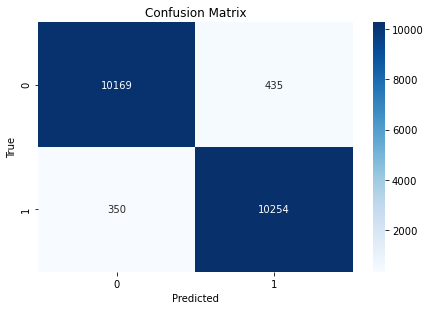

In [17]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_predict_test)

fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="Blues" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')

In [18]:
accuracy = (10254+10169)/(10169+435+350+10254)
print(accuracy)

0.9629856657864957


The above depicts a confusion matrix.  Confusion matrices are useful for measuring recall, precision, and accuracy.  It is a visual representation of actual versus predicted values.  There are four elements of a confusion matrix:

True Positive: The values which were actually positive and were predicted positive.

False Positive: The values which were actually negative but falsely predicted as positive. Also known as Type I Error.

False Negative: The values which were actually positive but falsely predicted as negative. Also known as Type II Error.

True Negative: The values which were actually negative and were predicted negative.

So knowing that, the above confusion matrix illustrates the following:

True Positives = 10,254

False Positives = 435

False Negatives = 350

True Negatives = 10,169

The accuracy of the confusion matrix is approximately 0.9630. 

In this notebook we have examined the data, pre-processed it, performed a train/test split, and constructed a Logistic Regression model.  The Logistic Regression model fit the data very well, as we can see with the classification report and confusion matrix.  

In [20]:
#save the data to a new csv file
df.to_csv('/Users/lauren/Desktop/Diabetes_dataset.csv')
X_train.to_csv('/Users/lauren/Desktop/Diabetes_X_train.csv')
X_test.to_csv('/Users/lauren/Desktop/Diabetes_X_test.csv')
y_train.to_csv('/Users/lauren/Desktop/Diabetes_y_train.csv')
y_test.to_csv('/Users/lauren/Desktop/Diabetes_y_test.csv')